In [1]:
### Load packages for dataframes and matrices
import numpy as np
import pandas as pd
import os
### Load packages for plotting
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import matplotlib.patches as mpatches

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [ ]:
### Upload data to Google Colab
from google.colab import files
files.upload()

In [ ]:
### Alternative method to upload data without Colab
# pison_df = pd.read_csv("./pison_data_interview.csv")

In [3]:
### Assign column names before reading CSV
colnames = [
    'timestamp', 'channel_0_raw', 'channel_1_raw', 'channel_0_hp',
    'channel_1_hp', 'quat_x', 'quat_y', 'quat_z', 'quat_w', 'gyro_x', 'gyro_y',
    'gyro_z', 'acc_x', 'acc_y', 'acc_z', 'bml', 'rep_num'
]
### Read in CSV with colnames
pison_df = pd.read_csv("pison_data_interview.csv", names=colnames, header=None)

In [4]:
### Review DF
pison_df.head()

,timestamp,channel_0_raw,channel_1_raw,channel_0_hp,channel_1_hp,quat_x,quat_y,quat_z,quat_w,gyro_x,gyro_y,gyro_z,acc_x,acc_y,acc_z,bml,rep_num
0,1514824.503,12535249,12566283,-11889,17295,0.32196,-0.596619,-0.621826,0.392090,-1.342870,1.063105,0.503576,-0.660156,-10.003906,1.21875,0,1
1,1514827.496,12536264,12559246,-2063,13384,0.32196,-0.596741,-0.621826,0.392029,-1.510729,1.175011,0.000000,-0.660156,-10.003906,1.21875,0,1
2,1514830.493,12538584,12565279,2757,16008,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
3,1514833.500,12546745,12567024,7504,5644,0.32196,-0.596741,-0.621765,0.391968,-1.230964,1.175011,-0.279765,-0.660156,-10.003906,1.21875,0,1
4,1514836.498,12537375,12545467,-3855,-15893,0.32196,-0.596802,-0.621765,0.391907,-1.063105,0.839294,-0.727388,-0.660156,-10.003906,1.21875,0,1


In [5]:
### Check for any na values
pison_df.isnull().values.any()

False

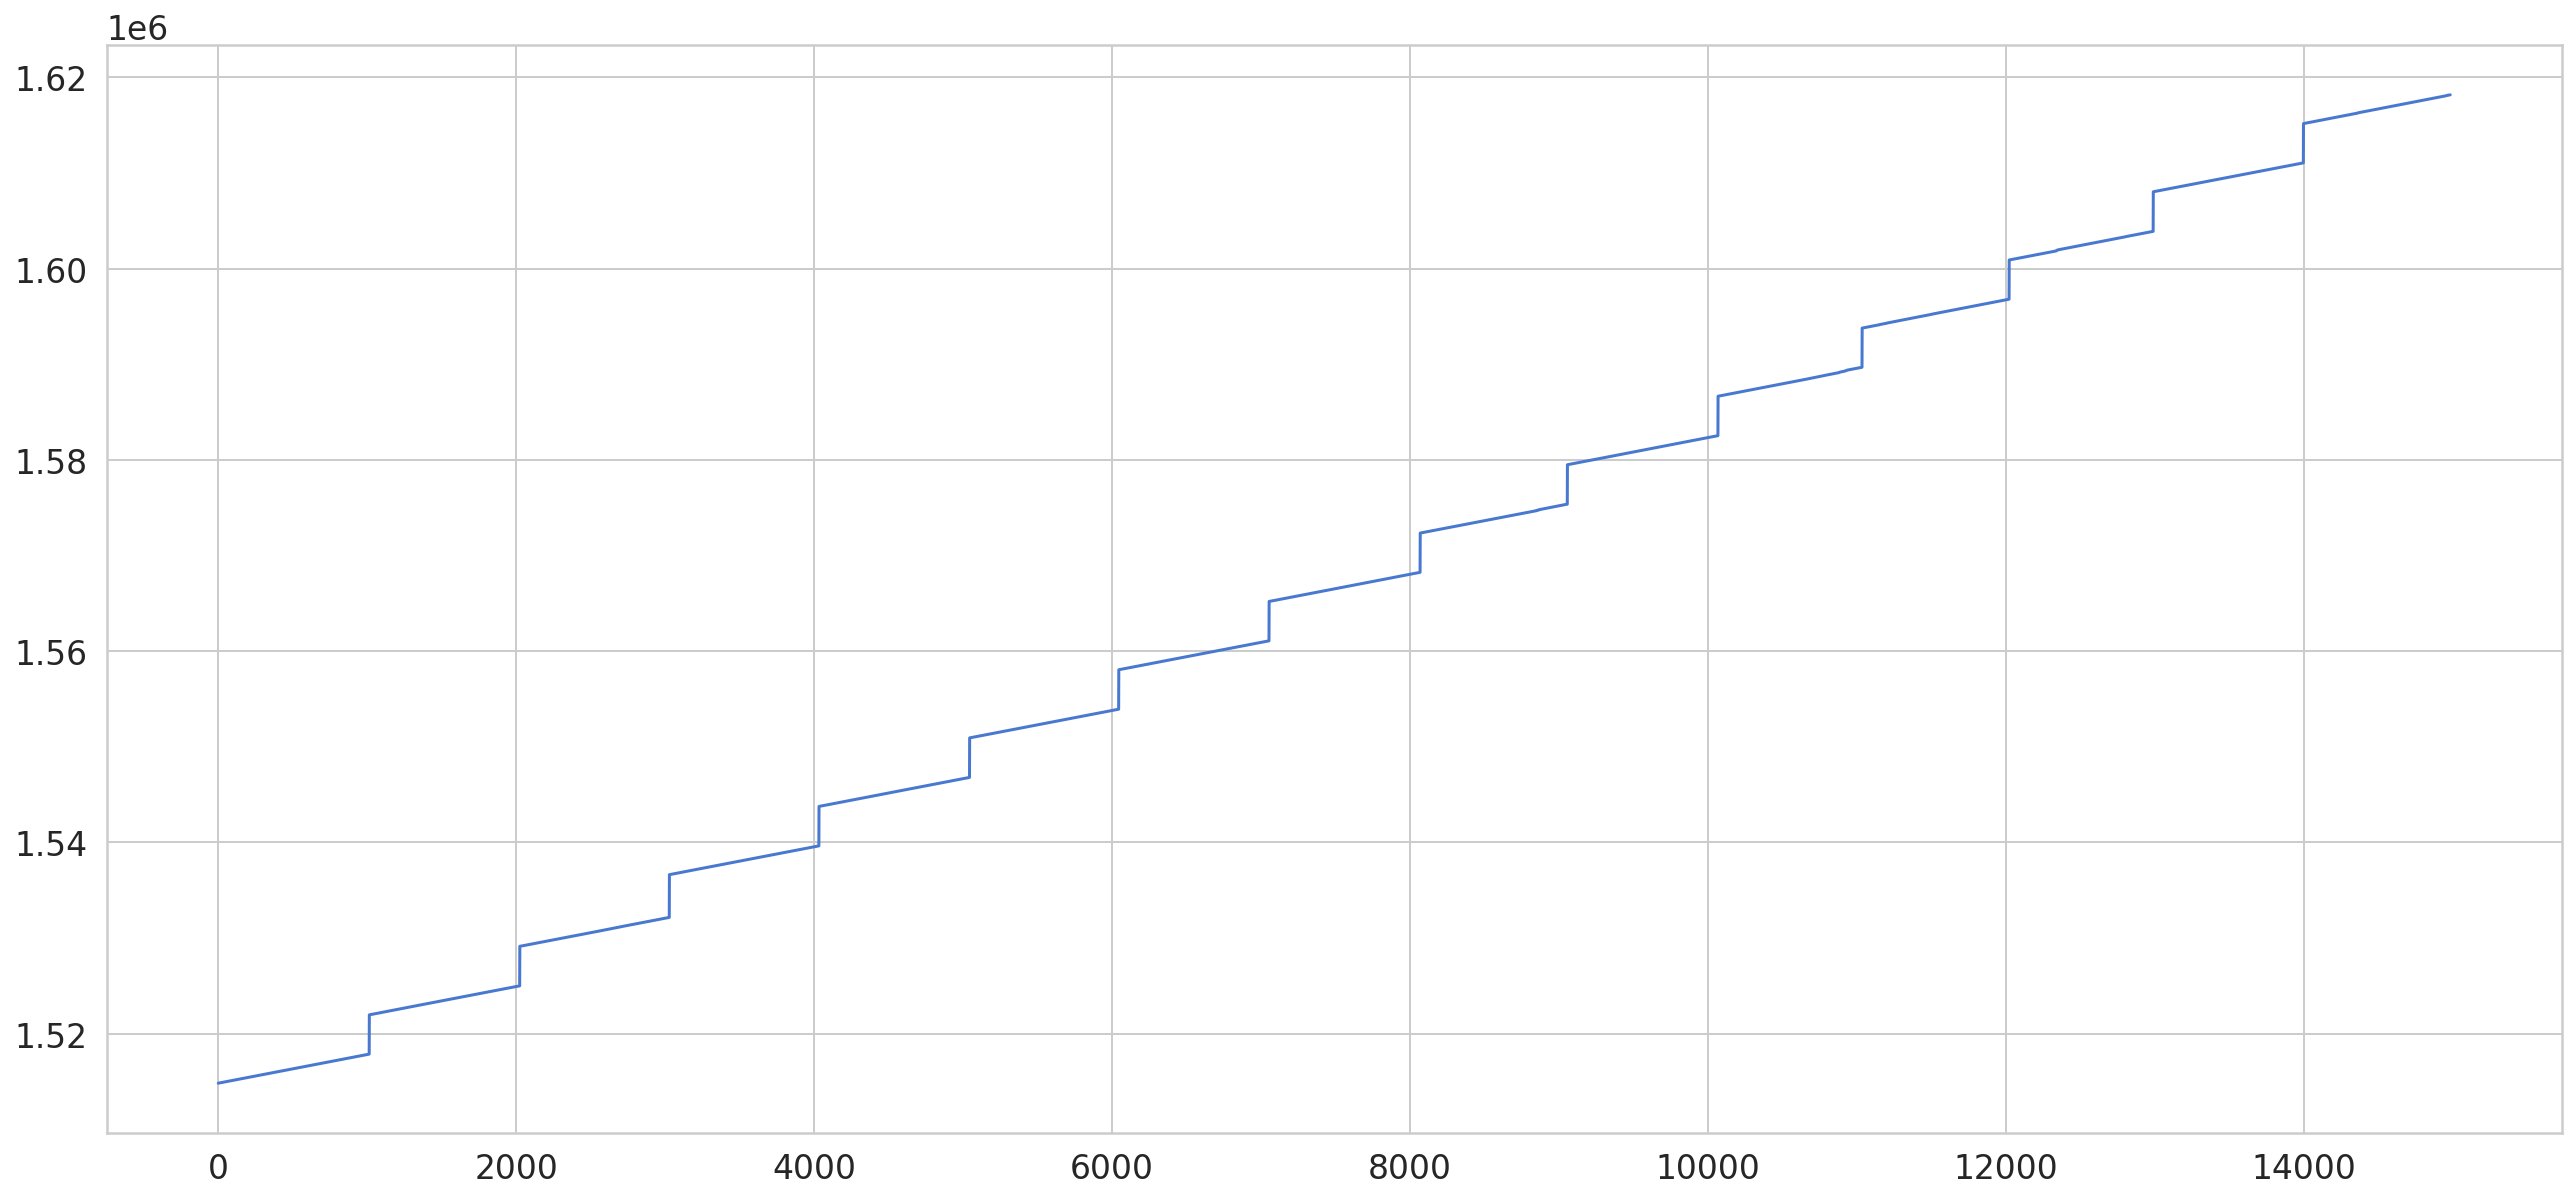

In [6]:
### Assess timesteps
plt.plot(pison_df['timestamp'])

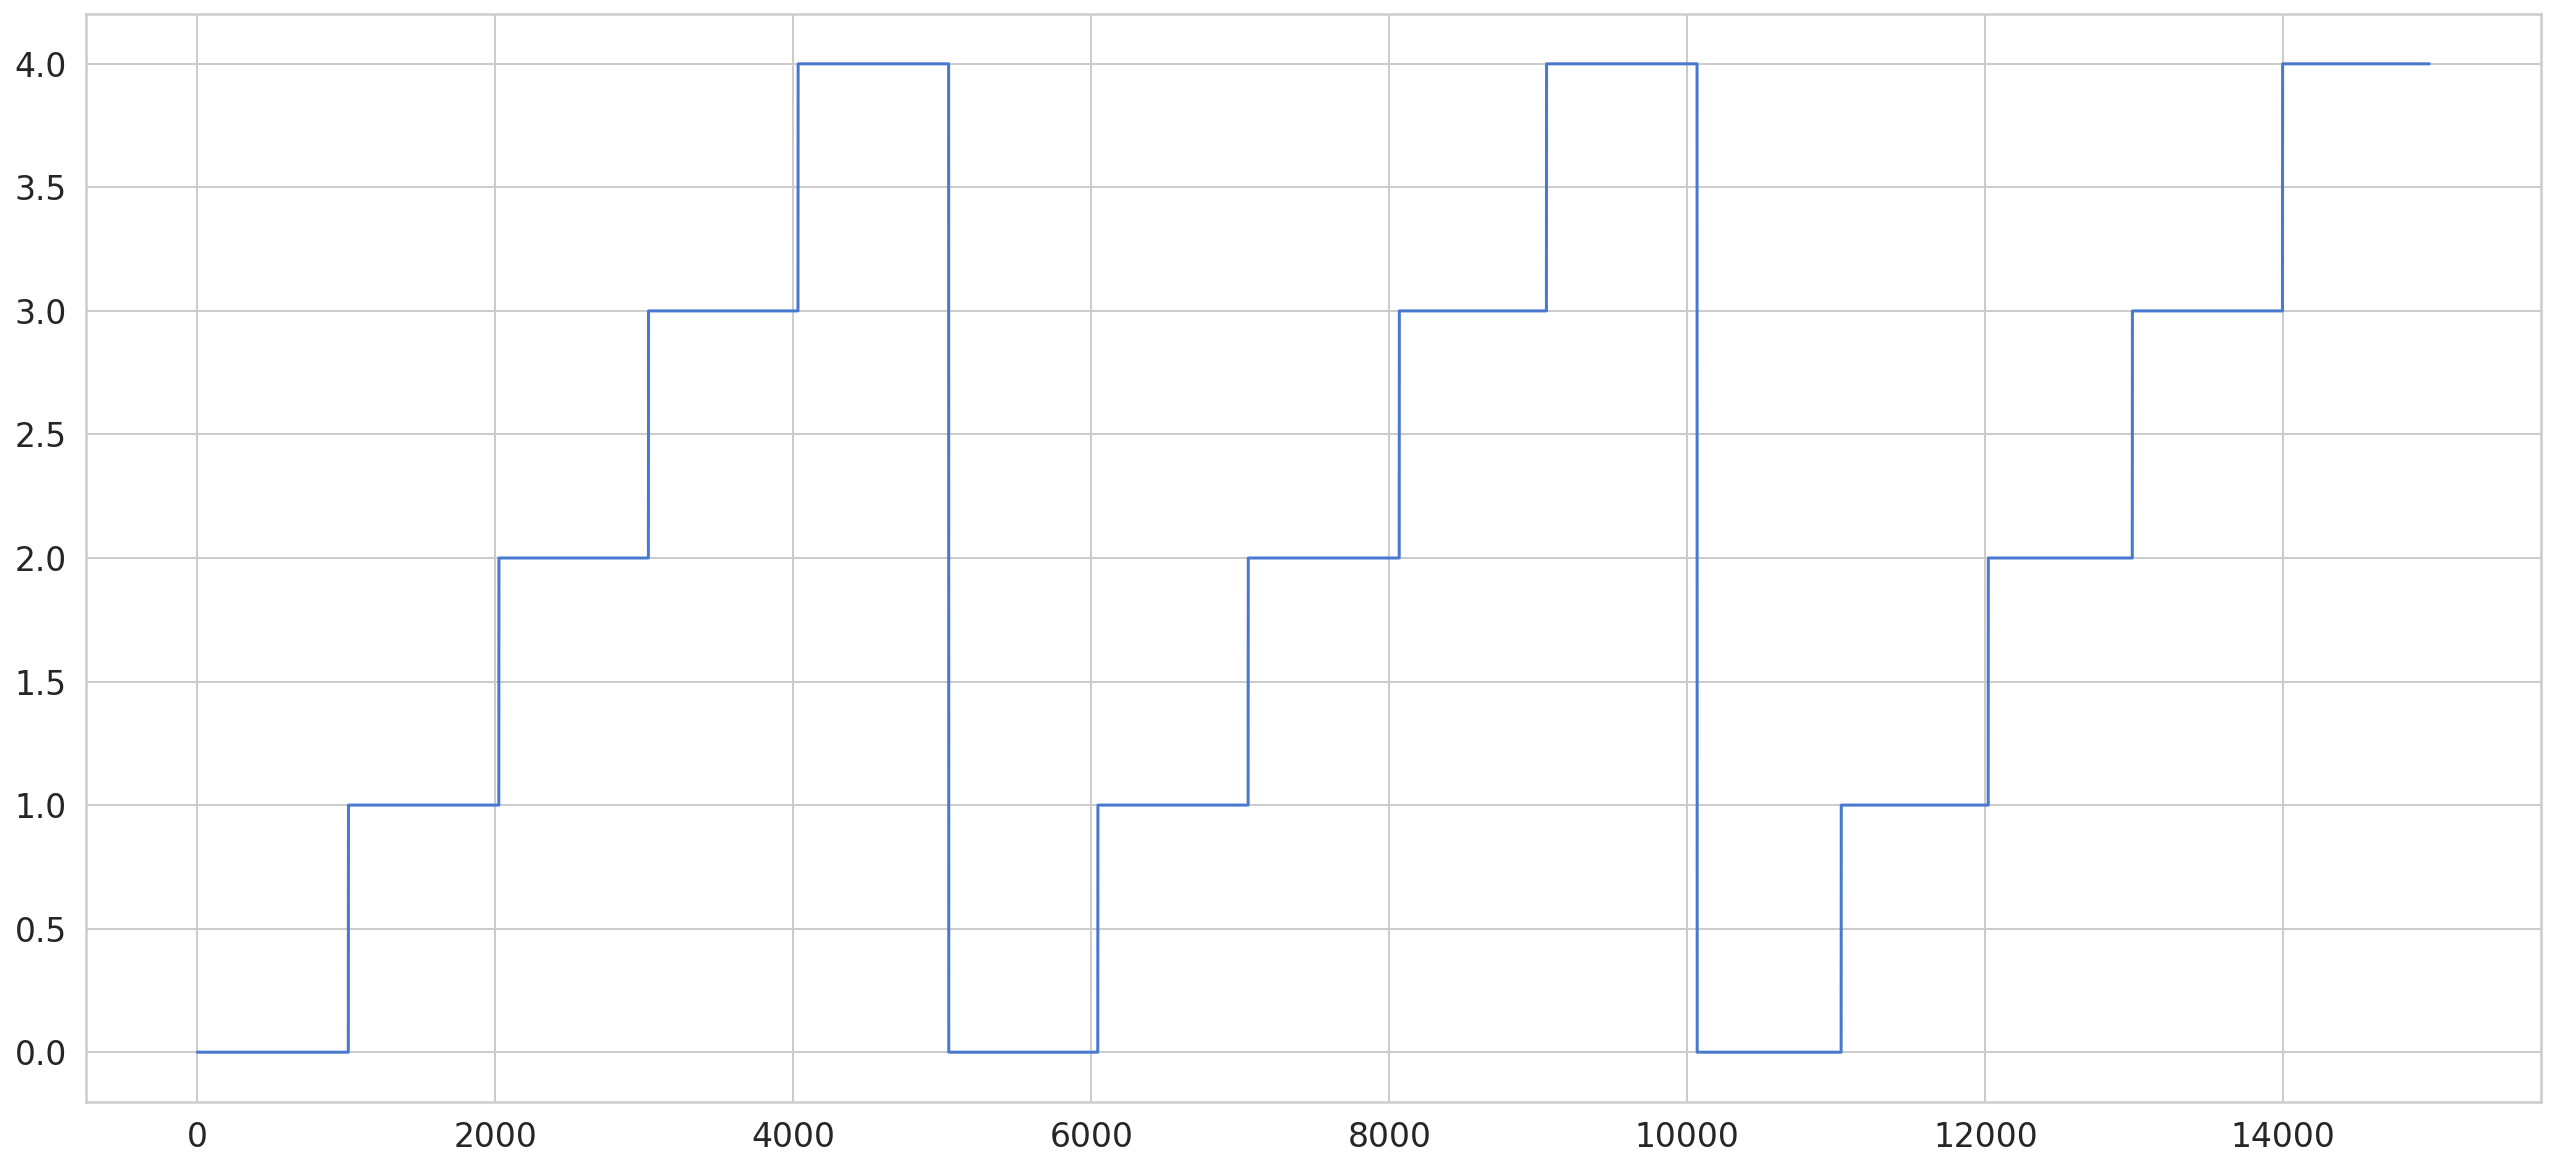

In [9]:
plt.plot(pison_df['bml'])

`bml` = The body movement coding is:

0 = standing #1

1 = standing #2

2 = walking

3 = walking fast

4 = running

**The accelerometer and gyroscope coordinates follow the ENU convention:**

`acc_x`, `gyro_x` = The X-axis points East

`acc_y`, `gyro_y` = The Y-axis points North

`acc_z`, `gyro_z` = The Z-axis points Up

**The quaternion coordinates follow the convention:**

`quat_x` = The X-axis points West

`quat_y` = The Y-axis points South

`quat_z` = The Z-axis points Up


### Tasks
1. For each `bml`, what is the user doing with their wrist during the whole body movement?

2. How many wrist-motion classes are there?

3. Use features to identify what motion each class is representing.

Each movement is roughly the same size

In [9]:
### Function to see how different activities look by looking at first 200 records
def plot_acc_gyro_activity(activity, df):
    data = df[df['bml'] == activity][['acc_x', 'gyro_x', 'acc_y', 'gyro_y', 'acc_z', 'gyro_z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))


### Function to see how different activities look by looking at first 200 records
def plot_quat_activity(activity, df):
    data = df[df['bml'] == activity][['quat_x', 'quat_y', 'quat_z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

Assess accelerometer, gyroscope, and quaternion data for first 200 points

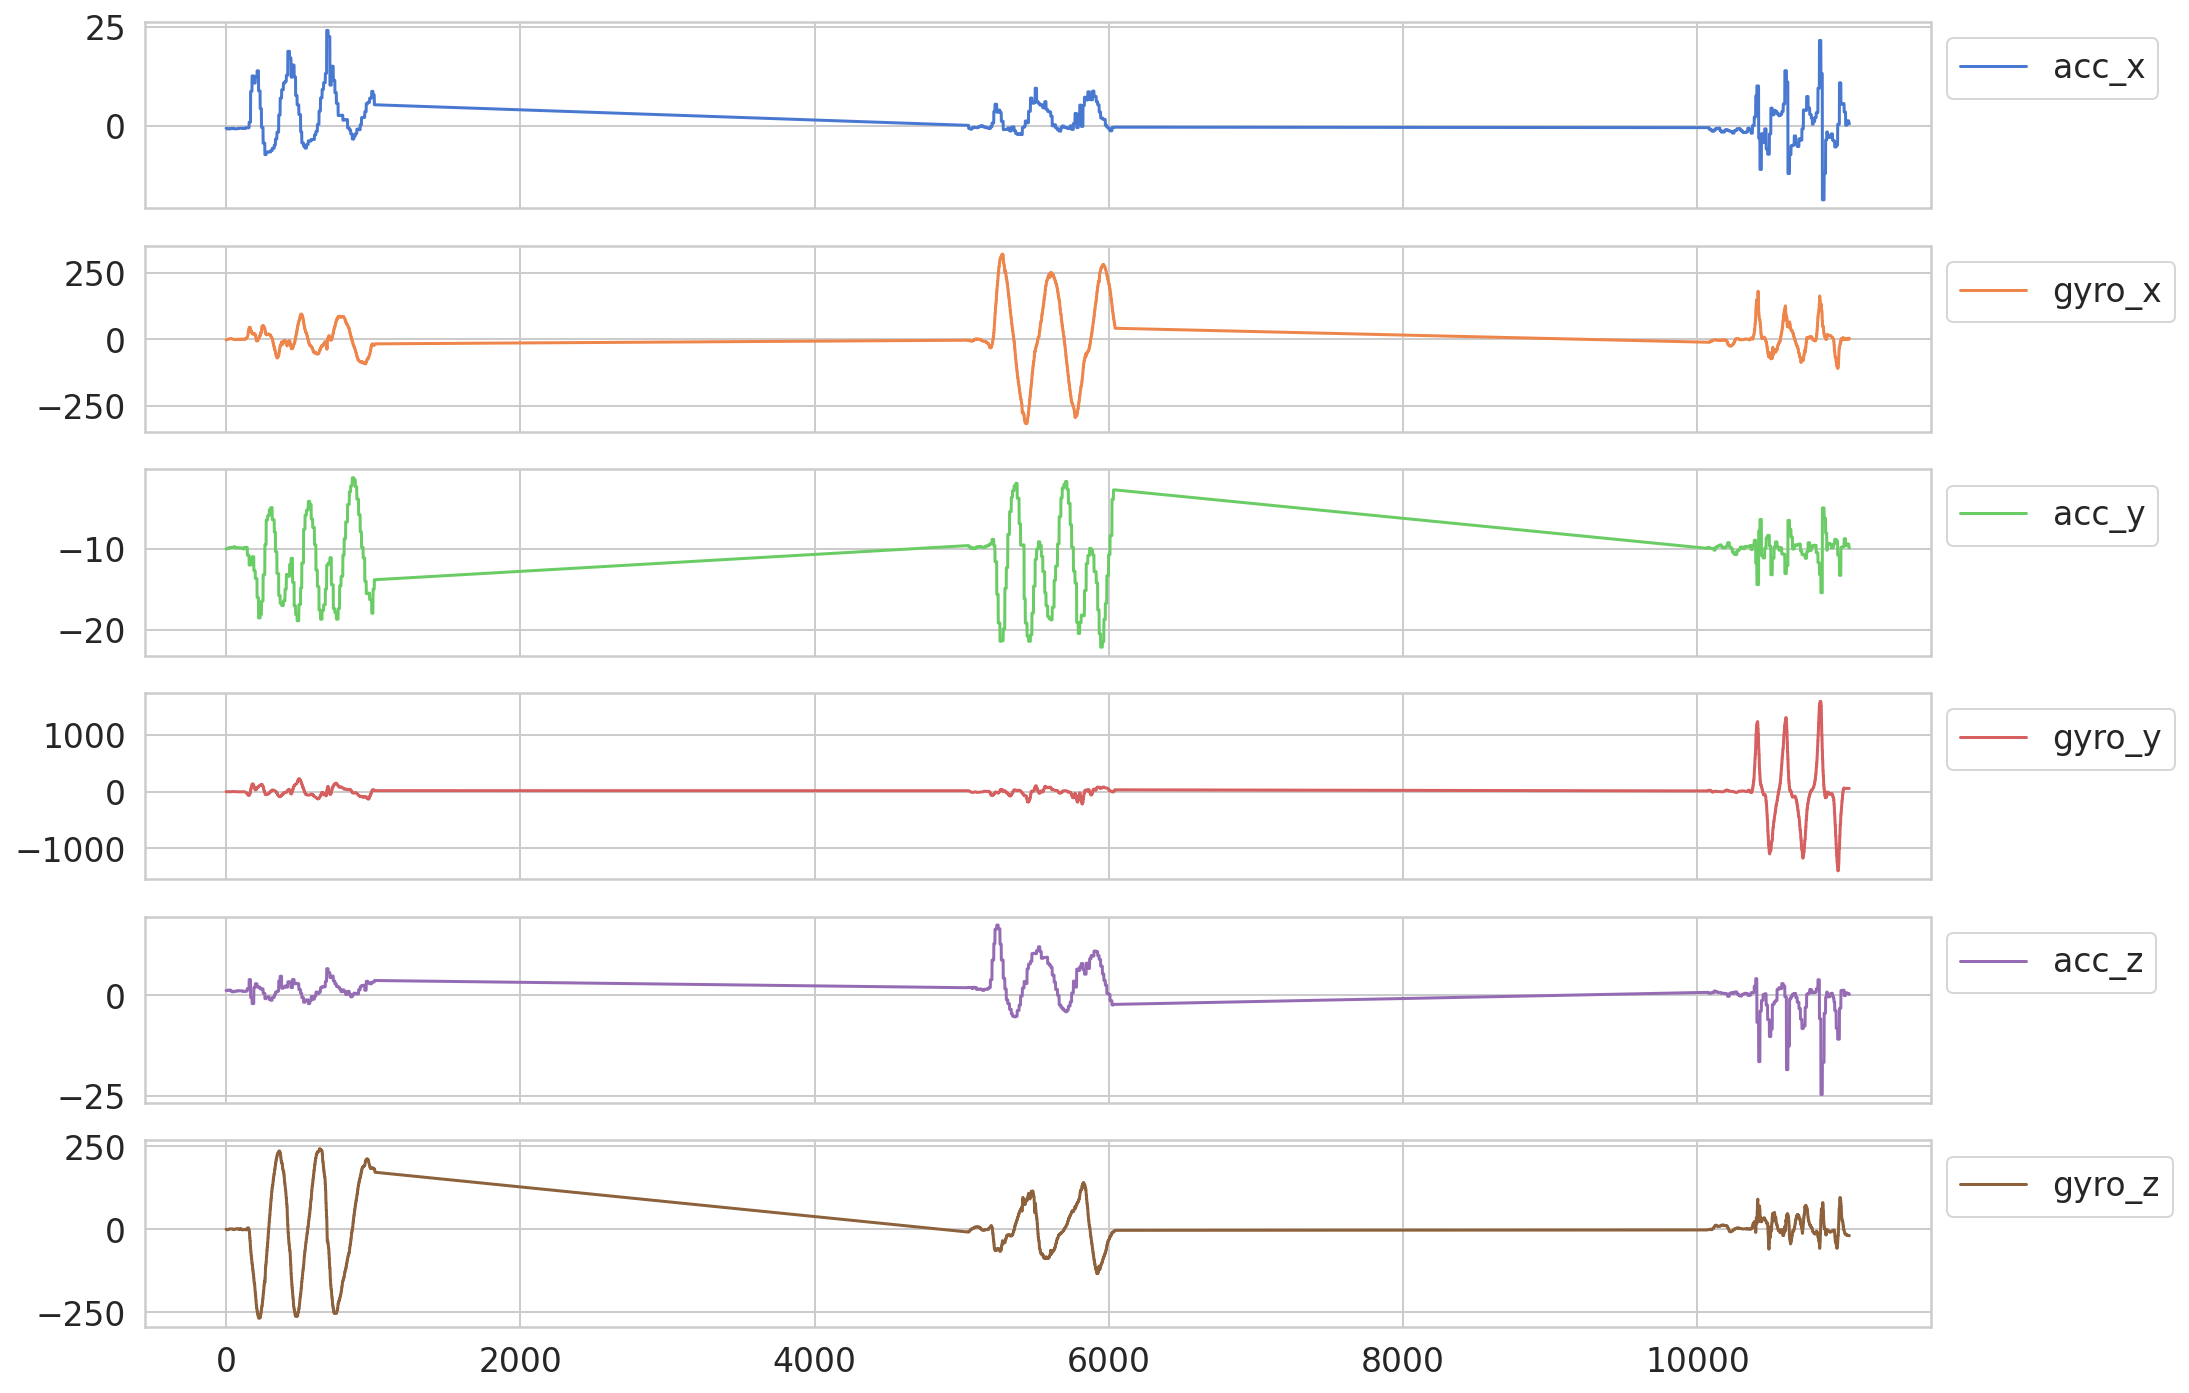

In [10]:
plot_acc_gyro_activity(0, pison_df)

In [ ]:
plot_quat_activity(0, pison_df)

In [ ]:
plot_acc_gyro_activity(1, pison_df)

In [ ]:
plot_quat_activity(1, pison_df)

In [ ]:
plot_acc_gyro_activity(2, pison_df)

In [ ]:
plot_quat_activity(2, pison_df)

In [ ]:
plot_acc_gyro_activity(3, pison_df)

In [ ]:
plot_quat_activity(3, pison_df)

In [ ]:
plot_acc_gyro_activity(4, pison_df)

In [ ]:
plot_quat_activity(4, pison_df)

In [12]:
### Scale acceleration and rotational data to 
from sklearn.preprocessing import RobustScaler
scale_columns = ['acc_x', 'acc_y', 'acc_z',
                 'gyro_x', 'gyro_y', 'gyro_z',
                 'quat_x', 'quat_y', 'quat_z']
'''
Consider scaling variables separately to account for different movements.
However, it should be fine to put them on the same scale because they
shouldn't be affected by the rate at which the user is moving rather than
the directional rotation and amount they are using their wrists.
'''

# df_standing1 = pison_df[pison_df['bml'] == 0]
# df_standing2 = pison_df[pison_df['bml'] == 1]
# df_walking = pison_df[pison_df['bml'] == 2]
# df_walking_fast = pison_df[pison_df['bml'] == 3]
# df_running = pison_df[pison_df['bml'] == 4]
# transformer_standing1 = RobustScaler().fit_transform(df_standing1[scale_columns])
# transformer_standing2 = RobustScaler().fit_transform(df_standing2[scale_columns])
# transformer_walking = RobustScaler().fit_transform(df_walking[scale_columns])
# transformer_walking_f = RobustScaler().fit_transform(df_walking_fast[scale_columns])
# transformer_running = RobustScaler().fit_transform(df_running[scale_columns])
# df_all = np.concatenate([transformer_standing1, transformer_standing2,
#                          transformer_walking, transformer_walking_f,
#                          transformer_running], axis=0)

### Scale entire dataframe
scaler = RobustScaler().fit(pison_df[scale_columns])
df_scaled = scaler.transform(pison_df[scale_columns])

In [13]:
### Install kneed for k means tests
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
### Perform k means clustering
### Determine speed with tqdm
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
### Define keyword arguments for k means clustering
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in tqdm(range(1, 11)):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_)

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


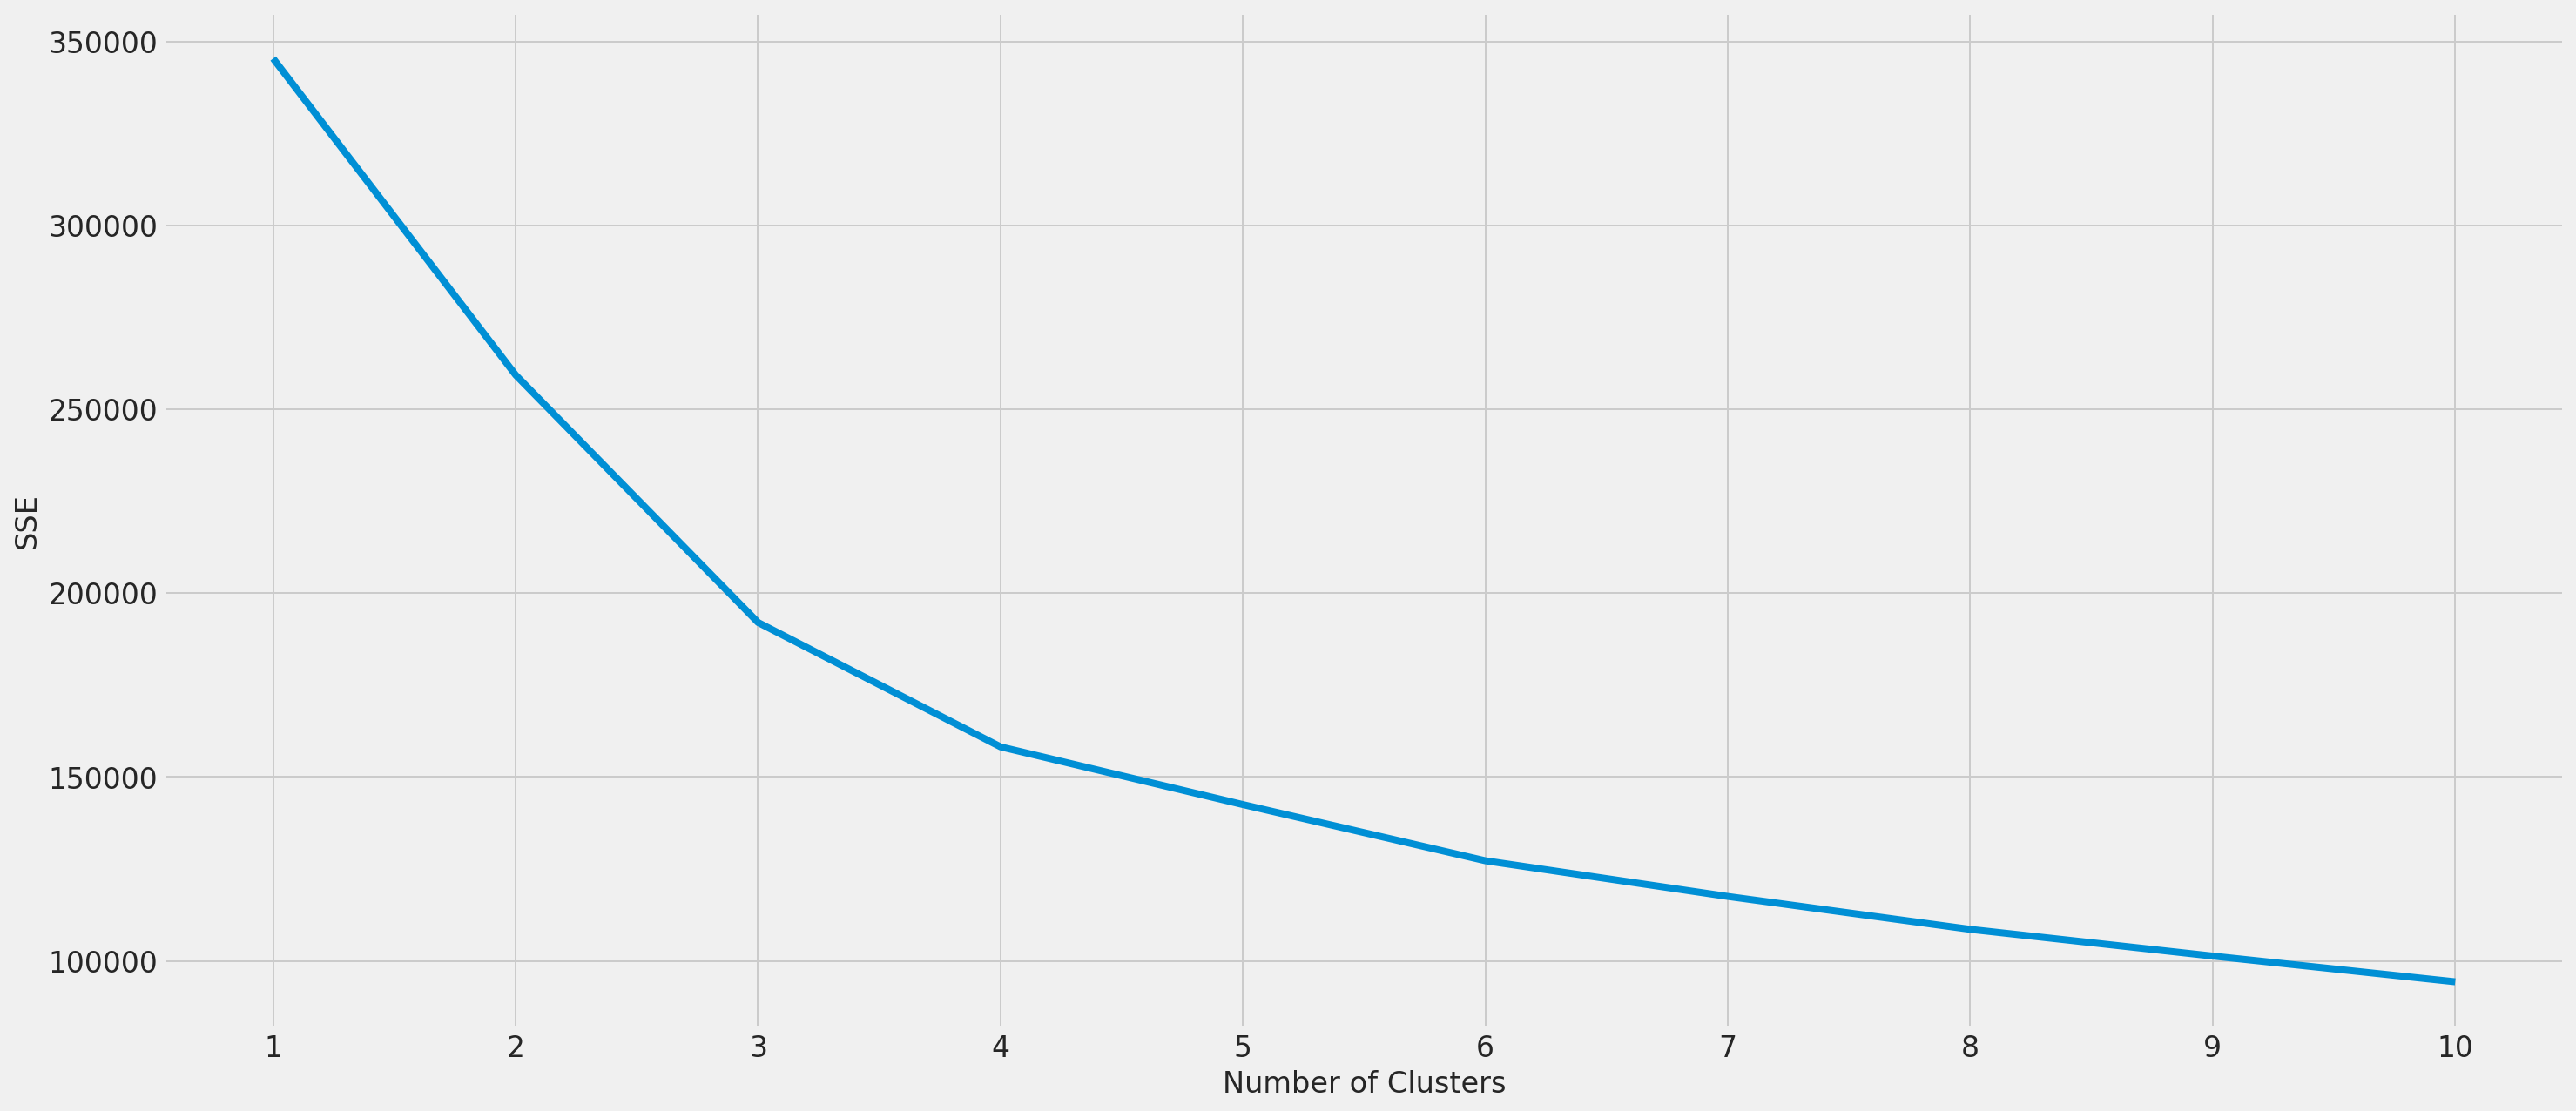

In [15]:
### Review KMeans results compared to SSE
### Check for elbow in plot to determine optimal cluster number
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
### Automatically determine optimal elbow
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

4

In [17]:
### Repeat K means clustering with optimal number of clusters
kmeans_updated = KMeans(n_clusters=kl.elbow, **kmeans_kwargs)
kmeans_updated.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [19]:
### Load train_test_split from sklearn to split data
from sklearn.model_selection import train_test_split
# df_all = pd.DataFrame(df_all)
df_all = pd.DataFrame(df_scaled)
df_all.columns = scale_columns
df_all['label'] = kmeans_updated.labels_
X = df_all.drop('label', axis=1)
y = df_all['label']
'''
Randomly split data into 70/30 train/test set
Since we are more interested in generalizing the data rather than
predicting forward in time, we can split the data randomly rather than
splitting it using past values for training and future values for testing,
similar to time-series forecasting.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [20]:
### xgboost to run extreme Gradient Boosting (XGBoost) algorithm
### Load in metrics for classification model analysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [21]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.13%


In [23]:
### Provide precision/recall and F1-score results for model
log_reg_bias_report = classification_report(y_test, y_pred)
print(log_reg_bias_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1129
           1       1.00      0.98      0.99       223
           2       0.99      0.99      0.99       239
           3       0.99      0.99      0.99      2904

    accuracy                           0.99      4495
   macro avg       0.99      0.99      0.99      4495
weighted avg       0.99      0.99      0.99      4495



In [24]:
### Assess cluster value counts
df_all['label'].value_counts()

3    9537
0    3810
2     835
1     799
Name: label, dtype: int64

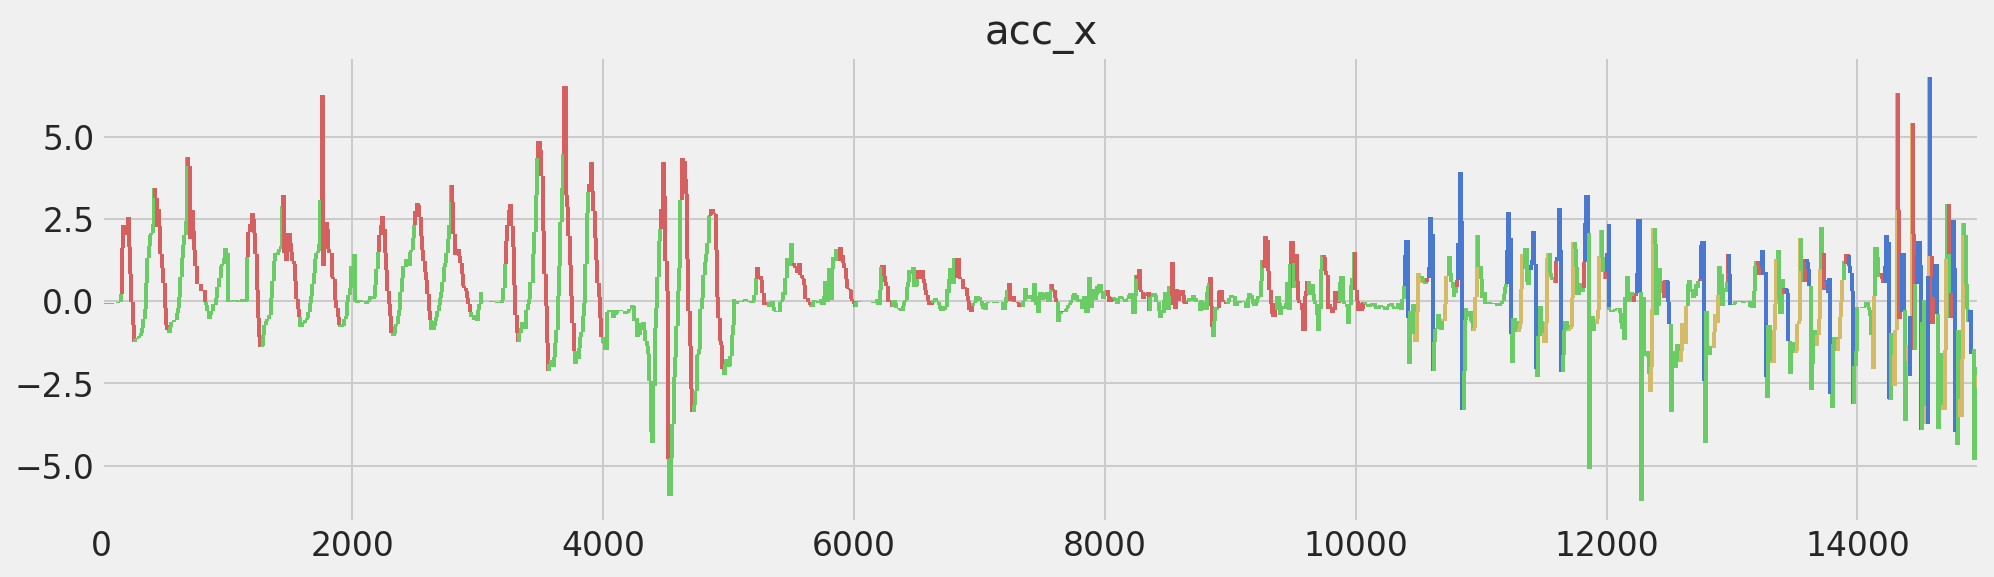

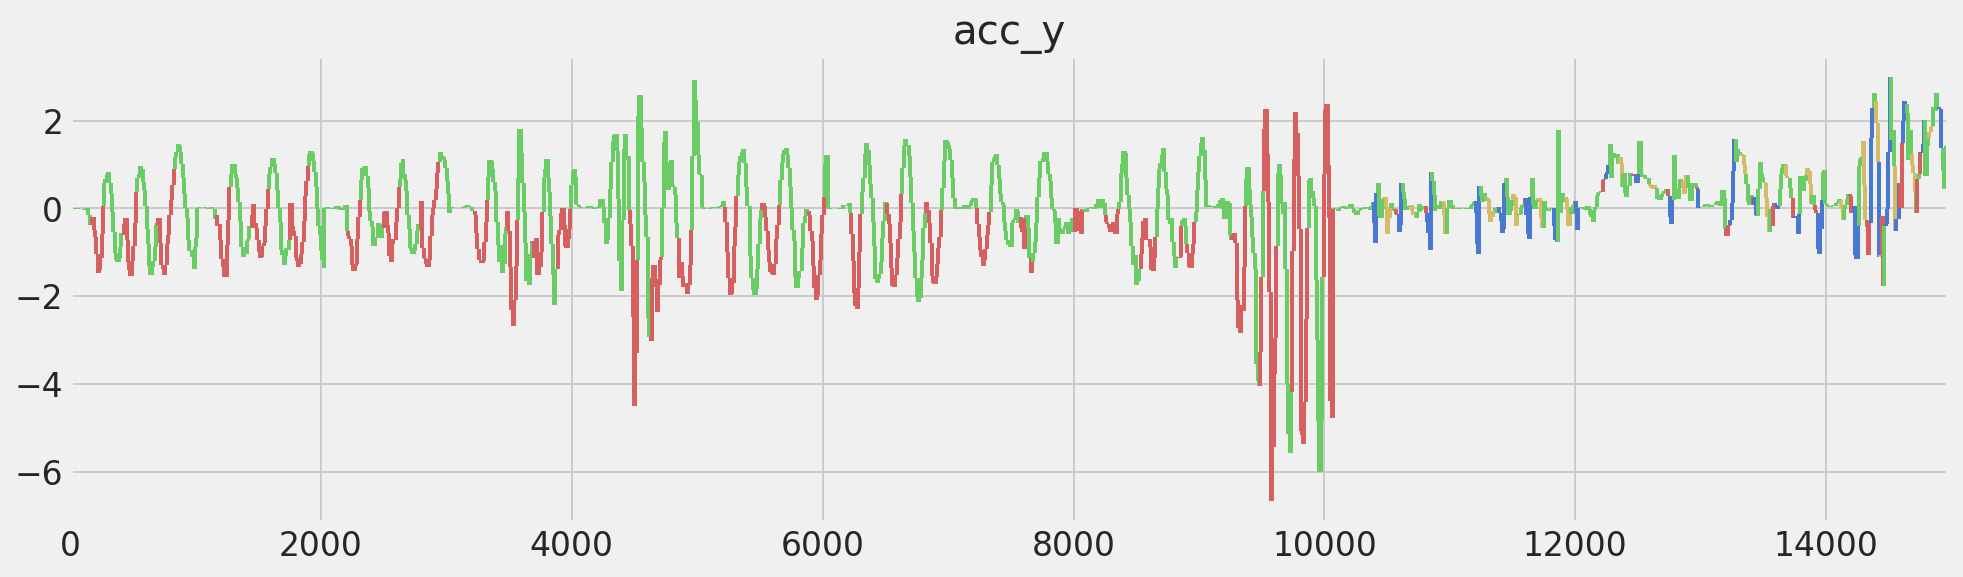

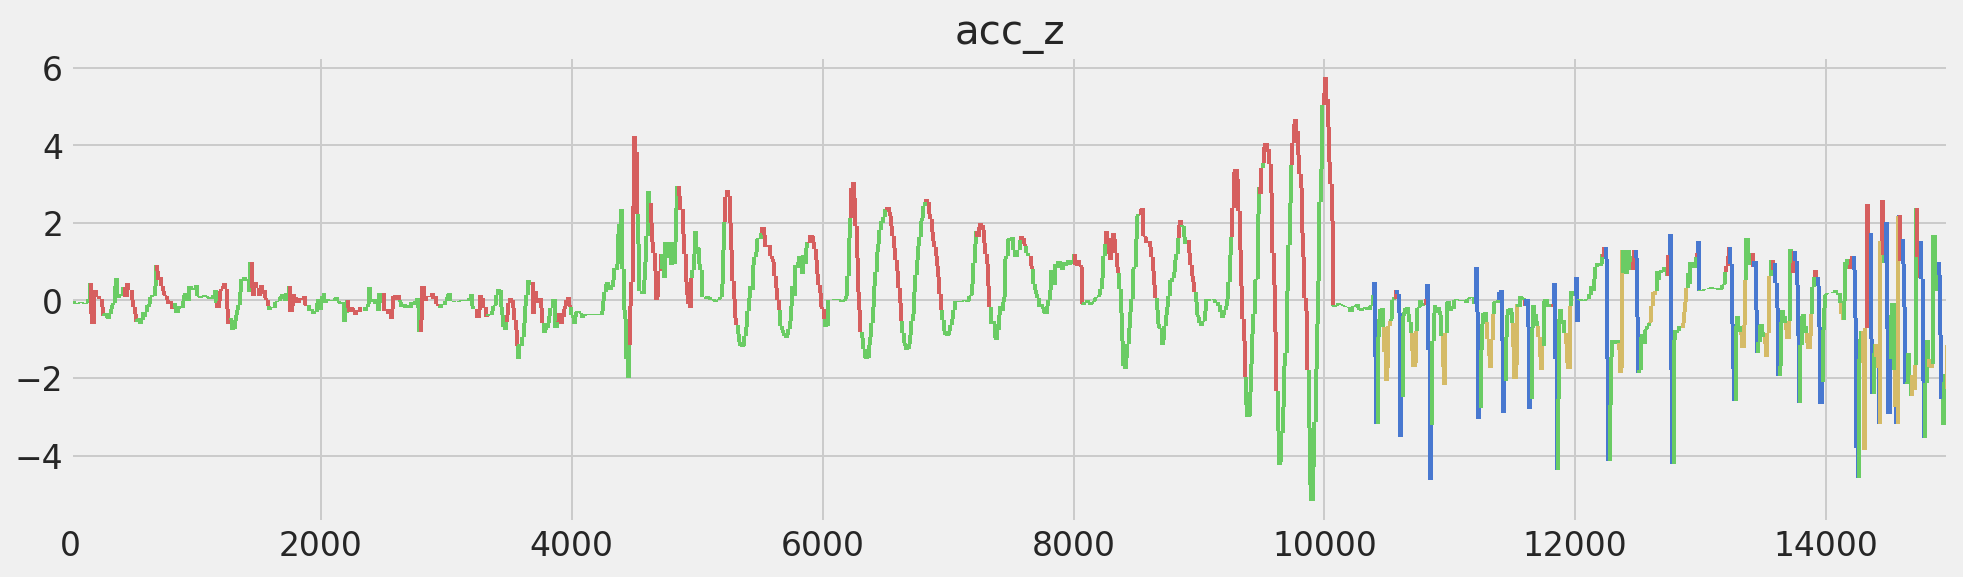

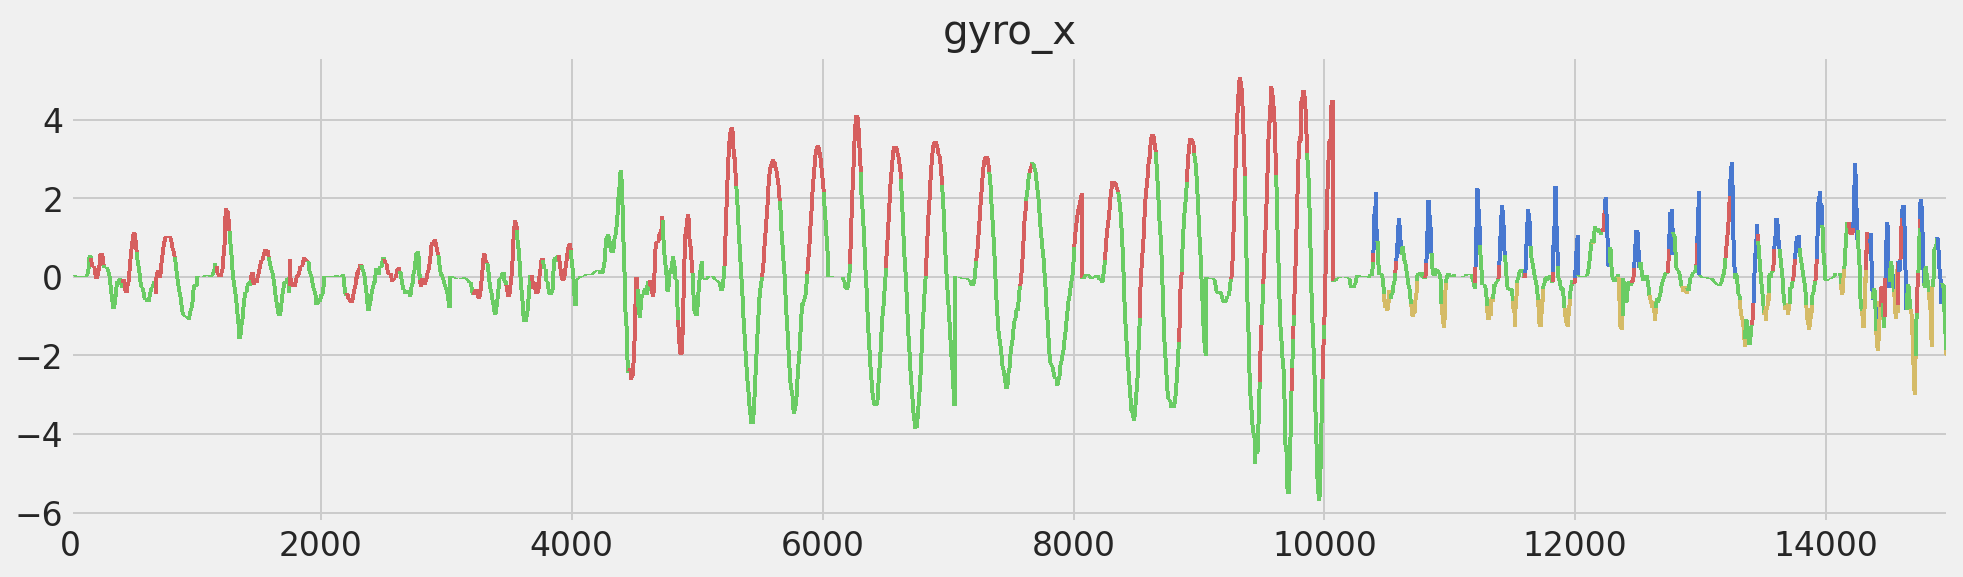

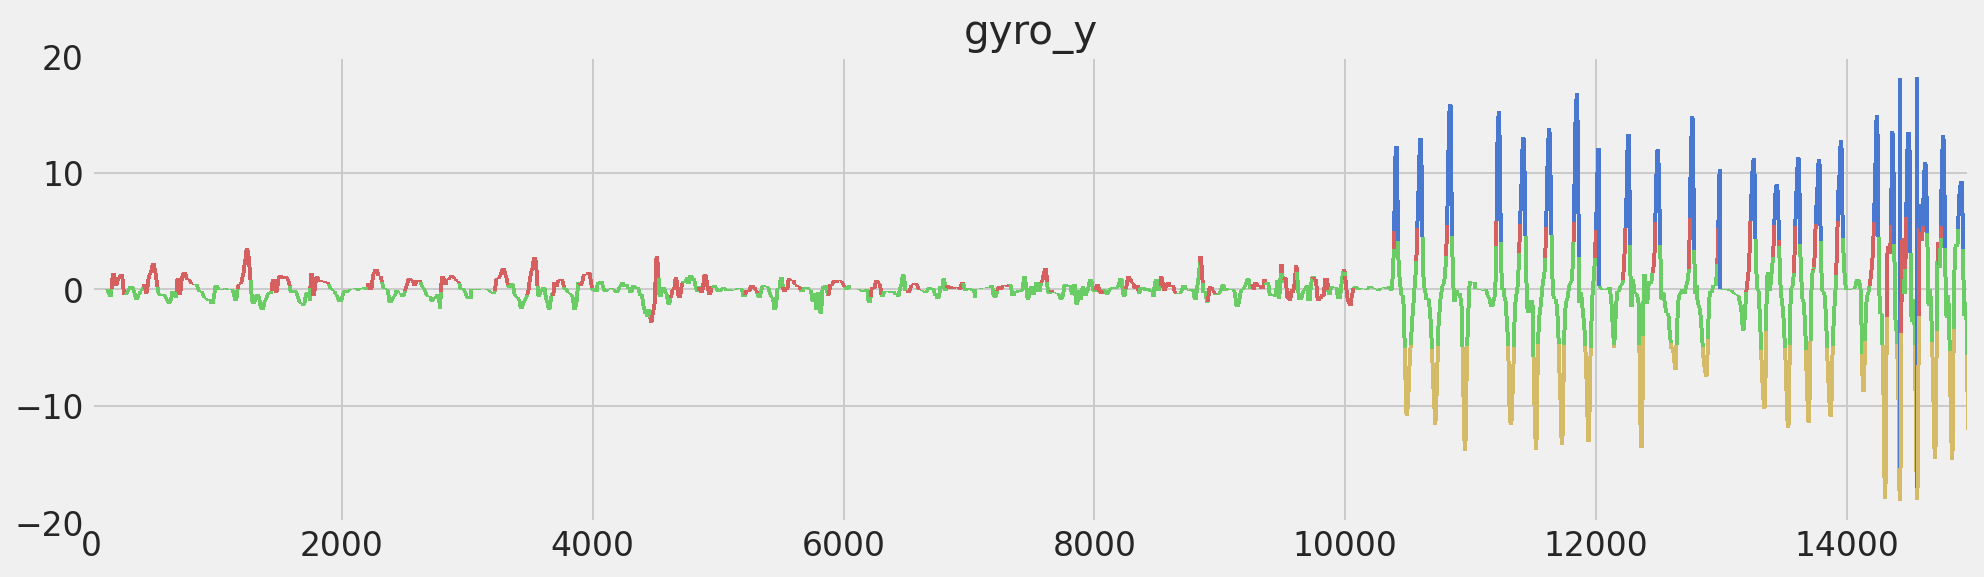

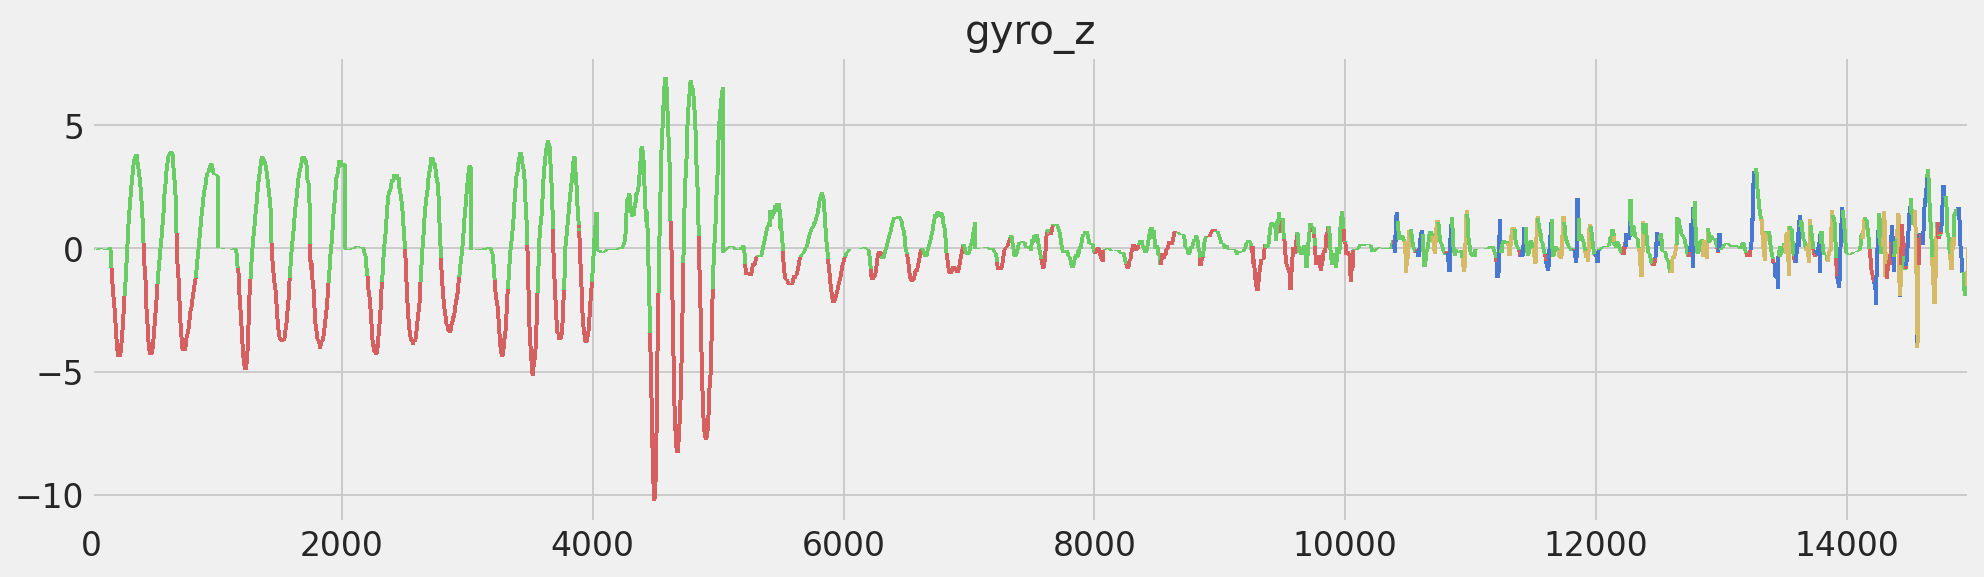

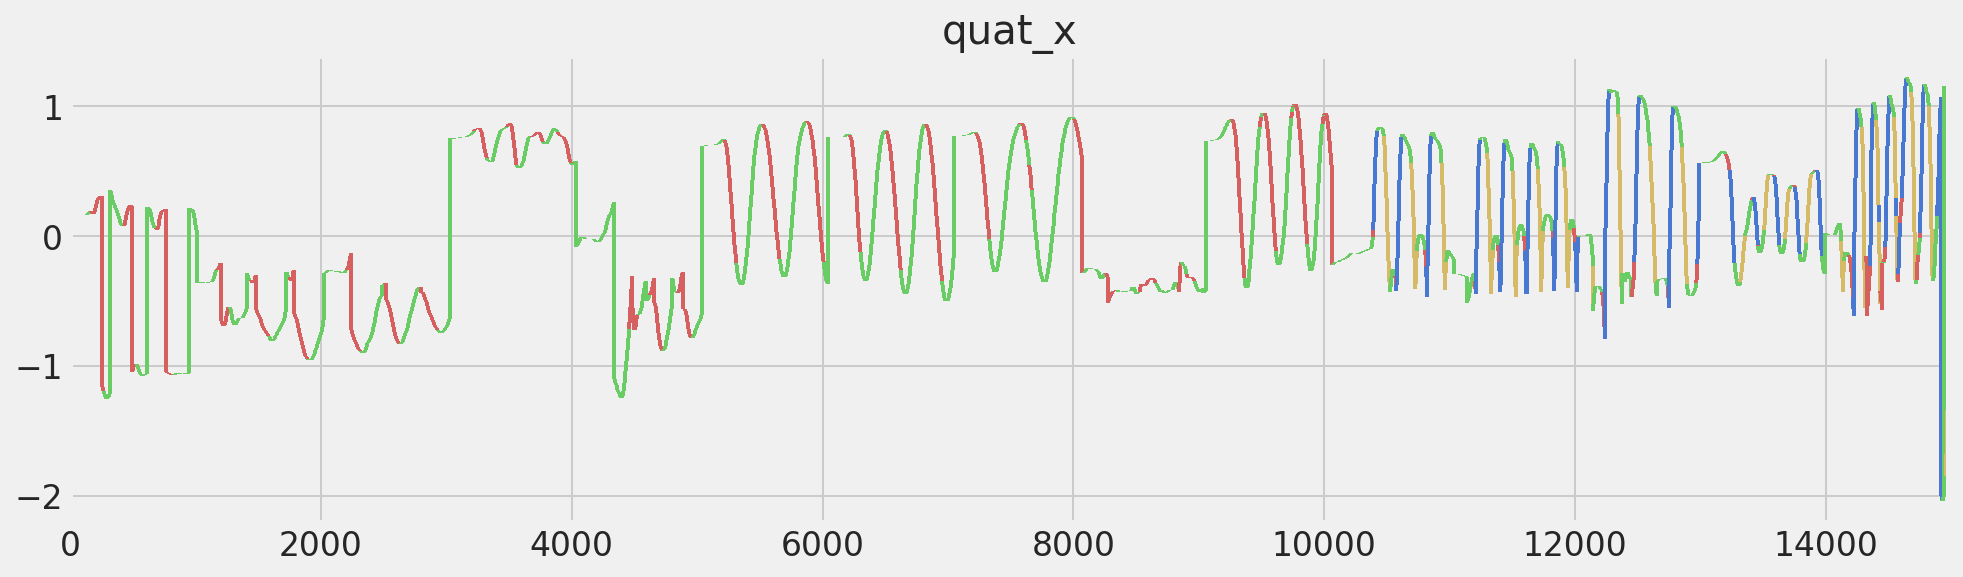

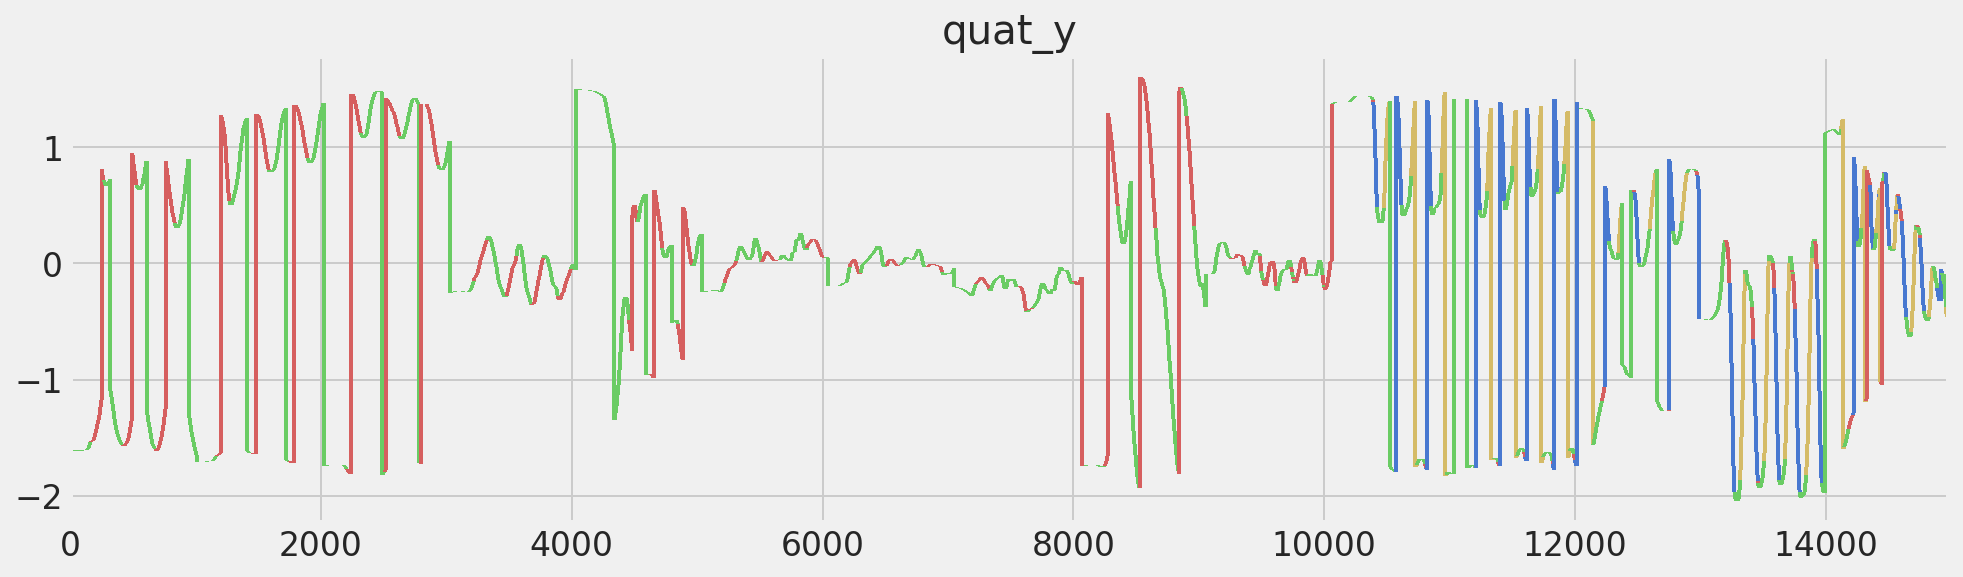

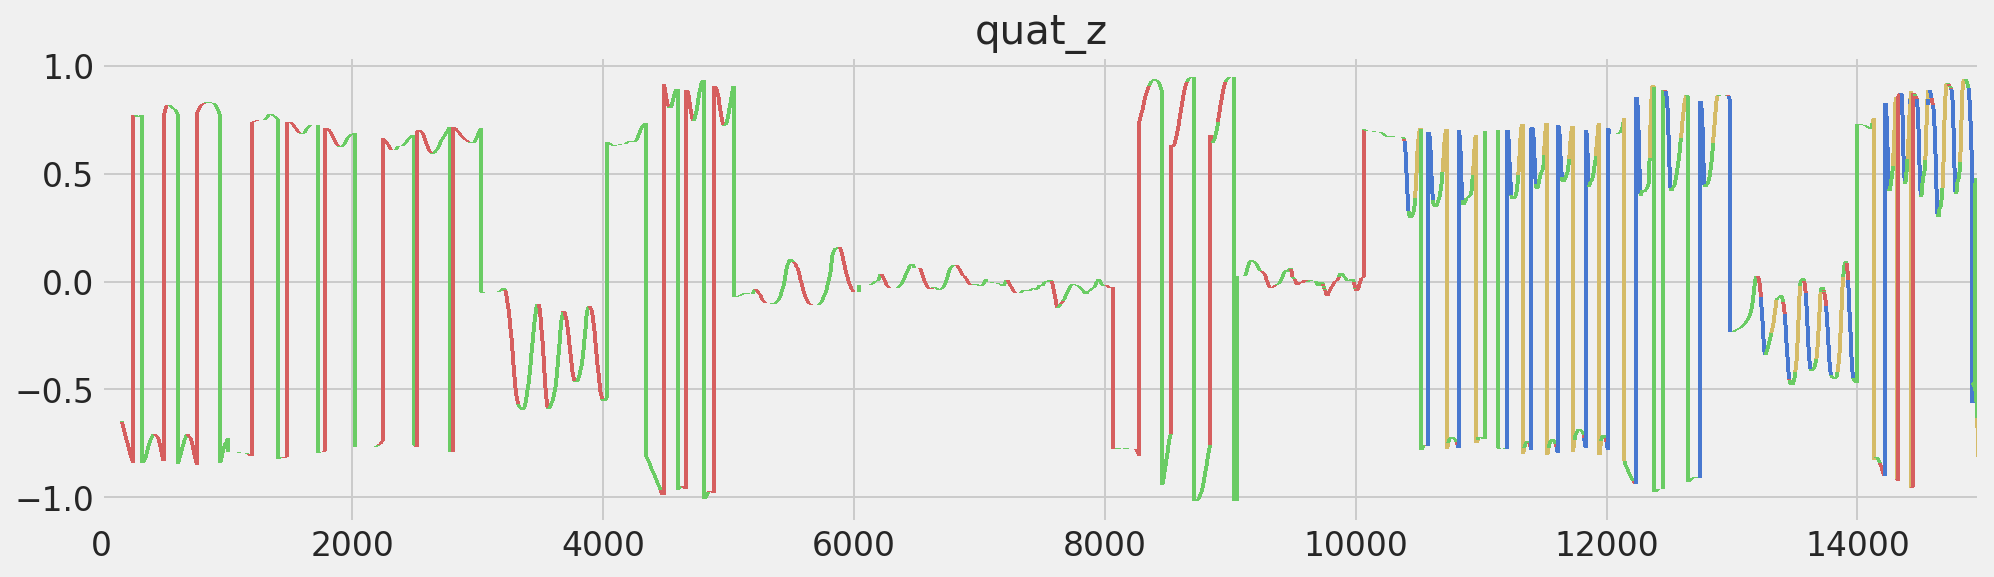

In [34]:
'''
Look at all data overlayed with clusters to see any trends
using scaled data to observe where clusters are located.
'''
from matplotlib.collections import LineCollection

data = df_all[['acc_x', 'gyro_x', 'quat_x',
               'acc_y', 'gyro_y', 'quat_y',
               'acc_z', 'gyro_z', 'quat_z']]
data_length = len(data)
for col in ['acc_x', 'acc_y', 'acc_z','gyro_x',  'gyro_y',  'gyro_z', 'quat_x', 'quat_y', 'quat_z']:
  lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in
           zip(data.index[:data_length], data[col][:-1],
               data.index[:data_length], data[col][1:])]
  color_dict = {0:'r', 1:'y', 2:'b', 3:'g'}
  c = [color_dict[a] for a in kmeans_updated.labels_[:data_length]]
  colored_lines = LineCollection(lines, colors=c, linewidths=(2,))
  # plot data
  fig, ax = plt.subplots(1)
  ax.add_collection(colored_lines)
  ax.autoscale_view()
  ax.set_xlim([0,data_length])
  fig.set_size_inches(15, 4)
  plt.title(col)
  plt.show()


In [32]:
### Look at center of each cluster to better assess sensor movement
cluster_df = pd.DataFrame(scaler.inverse_transform(kmeans_updated.cluster_centers_))
cluster_df.columns = scale_columns
cluster_df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_x,quat_y,quat_z
0,4.877456,-14.802135,6.629352,94.441593,71.427804,-108.036666,0.251276,0.088774,0.108910
1,-4.235524,-7.204782,-5.595378,-76.066965,-926.935860,0.432357,0.290341,0.100844,0.353486
2,5.214778,-8.797418,-1.224537,90.718094,983.371252,16.232308,0.384136,0.068212,0.335983
3,-1.162145,-9.281199,1.171280,-29.221322,-28.821644,45.202225,0.255451,0.030659,0.072777


In this notebook, we perform K-Means clustering to identify four different wrist movements by the user throughout the data set.
We then use the 4 clusters to perform extreme Gradient Boosting (XGBoost) to perform classification by developing an ensemble of decision trees.
The classifier identifies the user's wrist action during each whole-body movement with an accuracy of 99.13%. Furthermore, it has an F1-score of 0.99, representing the average between the precision and recall values. 

Based on the above centroid table and plots, each feature represents the following motion classes:
0. Accelerating East, South, and up. Increasing angular rotation East, North, and down.
1. Accelerating West, South, and down. Increasing angular rotation West, rapidly South, and slightly up.
2. Accelerating East, South, and down. Increasing angular rotation East, rapidly North, and up.
3. Accelerating West, South, and up. Increasing angular rotation West, South, and up.

In summary, the four movements include moving diagonally to the user's upper right, lower left, lower right, and upper left.
